In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_df = pd.read_csv('Train_Dataset.csv',low_memory=False)

In [3]:
train_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116156,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617437,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077498546,0.0979,0.0,2.0,0


In [4]:
test_df = pd.read_csv("Test_Dataset.csv", low_memory=False)

In [5]:
test_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,...,16.0,Yes,Yes,Self-employed,NaN,0.757150809,0.629674251,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,...,18.0,No,Yes,Self-employed,NaN,0.342269008,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,...,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683664701,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,...,20.0,No,No,Medicine,0.351581,0.229950297,0.67224289,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,...,13.0,Yes,Yes,Self-employed,0.731110,0.56697104,0.73098737,NaN,927.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80895,12210181,11700,0.0,0.0,0.0,1.0,2.0,107820,3152.25,Alone,...,9.0,Yes,No,Self-employed,0.495015,0.599435733,0.276440695,NaN,537.0,1.0
80896,12206257,29250,0.0,1.0,1.0,1.0,2.0,116430.75,4630.5,Alone,...,15.0,Yes,Yes,Kindergarten,0.803057,NaN,0.680138822,0.1072,316.0,0.0
80897,12200446,54000,1.0,0.0,1.0,1.0,0.0,52128,2742.3,Alone,...,14.0,Yes,No,Self-employed,NaN,0.40305926,0.215182404,NaN,426.0,0.0
80898,12244943,13500,0.0,0.0,1.0,0.0,0.0,25470,1435.05,Alone,...,5.0,Yes,Yes,Industry: type 9,NaN,0.236401524,0.579727423,0.1392,1186.0,2.0


In [6]:
train_df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Client_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [7]:
test_df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau'],
      dtype='object')

In [8]:
corr_matrix = train_df.corr().abs()

In [9]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper_tri

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Client_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
ID,NaN,0.00351,0.001487,0.000836,0.000588,0.008734,0.003739,0.002055,0.005787,0.003871,0.006603,0.002193,0.001520,0.001599,0.001940,0.000631,0.005373,0.000317,0.003077,0.000432
Car_Owned,NaN,NaN,0.000409,0.001577,0.008344,0.100579,NaN,0.004026,0.011443,0.008597,0.148582,0.022454,0.004885,0.013634,0.058389,0.016107,0.023986,0.036028,0.036618,0.023221
Bike_Owned,NaN,NaN,NaN,0.001545,0.002125,0.002209,0.005183,0.004123,0.002272,0.005849,0.003196,0.000219,0.003857,0.002122,0.005177,0.001188,0.004621,0.005310,0.000684,0.000431
Active_Loan,NaN,NaN,NaN,NaN,0.005709,0.001789,0.005846,0.002904,0.001333,0.000222,0.000822,0.002666,0.001355,0.004346,0.000964,0.000458,0.007305,0.008826,0.009045,0.000240
House_Own,NaN,NaN,NaN,NaN,NaN,0.003286,0.001308,0.001940,0.112196,0.040484,0.007500,0.003755,0.011574,0.105234,0.079623,0.003951,0.009756,0.023267,0.067270,0.001011
Child_Count,NaN,NaN,NaN,NaN,NaN,NaN,0.004485,0.001667,0.052229,0.030280,0.880352,0.025100,0.000803,0.009562,0.135047,0.006385,0.008503,0.008873,0.036770,0.019687
Own_House_Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003589,0.053890,0.062764,0.015369,0.089302,0.014701,0.068244,0.085453,0.022392,0.050396,0.004120,0.009777,0.047513
Mobile_Tag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001435,0.001792,0.000489,0.000172,0.003027,0.000831,NaN,NaN,0.000237,NaN,NaN,0.000849
Homephone_Tag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290171,0.065822,0.013565,0.016965,0.036800,0.076378,0.006064,0.013785,0.048182,0.077085,0.021593
Workphone_Working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014515,0.078998,0.011408,0.061976,0.076516,0.013852,0.058368,0.070955,0.029574,0.025682


In [10]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

[]

In [11]:
train_df.corr()['Default'].sort_values()

Score_Source_1             -0.146809
Phone_Change               -0.054591
Score_Source_2             -0.038085
Social_Circle_Default      -0.032631
Workphone_Working          -0.025682
Application_Process_Hour   -0.023589
Car_Owned                  -0.023221
House_Own                  -0.001011
Active_Loan                 0.000240
Bike_Owned                  0.000431
ID                          0.000432
Mobile_Tag                  0.000849
Application_Process_Day     0.005693
Client_Family_Members       0.011110
Child_Count                 0.019687
Credit_Bureau               0.020001
Homephone_Tag               0.021593
Own_House_Age               0.047513
Client_City_Rating          0.058857
Default                     1.000000
Name: Default, dtype: float64

In [12]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Client_City_Rating          

In [13]:
train_df['Own_House_Age'].unique()

array([nan,  0.,  6., 10., 14.,  1.,  3.,  2.,  7., 15., 31., 16., 13.,
       64.,  8., 20., 17.,  4., 18., 22.,  9.,  5., 23., 12., 32., 27.,
       50., 19., 29., 24., 65., 11., 25., 26., 30., 28., 39., 21., 44.,
       35., 33., 37., 40., 36., 34., 41., 57., 45., 38., 43., 63., 42.,
       54., 49., 69., 46.])

In [14]:
train_df.drop('Own_House_Age', axis=1, inplace=True) # Own_House_Age is dropped because of too much null values
test_df.drop('Own_House_Age', axis=1, inplace=True)

In [15]:
train_df['Score_Source_1'].isna().sum()

68835

In [16]:
train_df.drop('Score_Source_1', axis=1, inplace=True) # Score_Source_1 is dropped because of too much null values
test_df.drop('Score_Source_1', axis=1, inplace=True)

In [17]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [18]:
len(train_df)/2

60928.0

In [19]:
train_df['Social_Circle_Default']

0         0.0186
1            NaN
2         0.0742
3            NaN
4         0.2021
           ...  
121851    0.0577
121852    0.0825
121853       NaN
121854    0.0979
121855    0.1031
Name: Social_Circle_Default, Length: 121856, dtype: float64

<AxesSubplot:>

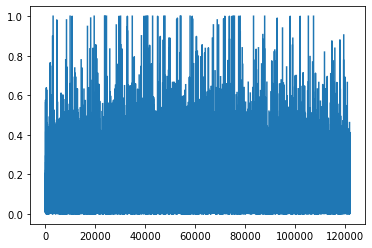

In [20]:
train_df['Social_Circle_Default'].plot()

In [21]:
train_df[train_df['Social_Circle_Default'] != np.nan].corr()['Default'].sort_values()

Phone_Change               -0.054591
Score_Source_2             -0.038085
Social_Circle_Default      -0.032631
Workphone_Working          -0.025682
Application_Process_Hour   -0.023589
Car_Owned                  -0.023221
House_Own                  -0.001011
Active_Loan                 0.000240
Bike_Owned                  0.000431
ID                          0.000432
Mobile_Tag                  0.000849
Application_Process_Day     0.005693
Client_Family_Members       0.011110
Child_Count                 0.019687
Credit_Bureau               0.020001
Homephone_Tag               0.021593
Client_City_Rating          0.058857
Default                     1.000000
Name: Default, dtype: float64

In [22]:
train_df.drop('Social_Circle_Default', axis=1, inplace=True) # Social_Circle_Default is dropped because of too much null values
test_df.drop('Social_Circle_Default', axis=1, inplace=True)

In [23]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [24]:
train_df['Client_Occupation']

0                   Sales
1                     NaN
2           Realty agents
3                     NaN
4                Laborers
               ...       
121851           Laborers
121852              Sales
121853    High skill tech
121854              Sales
121855           Managers
Name: Client_Occupation, Length: 121856, dtype: object

In [25]:
train_df.fillna(value={'Client_Income_Type':'Other'},inplace=True) # filling null values with default values
train_df.fillna(value={'Client_Occupation':'Other'},inplace=True)
test_df.fillna(value={'Client_Income_Type':'Other'},inplace=True)
test_df.fillna(value={'Client_Occupation':'Other'},inplace=True)

In [26]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [27]:
train_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,NaN,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,3.0,10.0,Yes,Yes,Government,0.215068,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655054,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631354537,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355638717,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,4.0,16.0,Yes,No,Business Entity Type 2,0.173527,0.184116156,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,4.0,12.0,Yes,Yes,Self-employed,0.371559,0.406617437,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,5.0,11.0,No,No,Trade: type 6,0.048079,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,1.0,12.0,Yes,Yes,Business Entity Type 3,0.103538,0.077498546,0.0,2.0,0


In [28]:
info = pd.read_csv('Data_Dictionary.csv')

In [29]:
info

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [30]:
info['Description'][37]

'How many days before the loan application, client changed his/her phone'

In [31]:
train_df['Phone_Change']

0           63.0
1            NaN
2          277.0
3         1700.0
4          674.0
           ...  
121851       0.0
121852       4.0
121853       0.0
121854       0.0
121855     805.0
Name: Phone_Change, Length: 121856, dtype: float64

In [32]:
train_df[train_df['Default'] == 0]['Phone_Change']

0           63.0
1            NaN
2          277.0
3         1700.0
4          674.0
           ...  
121850    1581.0
121852       4.0
121853       0.0
121854       0.0
121855     805.0
Name: Phone_Change, Length: 112011, dtype: float64

In [33]:
train_df[train_df['Default'] == 1]['Phone_Change']

32         504.0
73        1568.0
75         104.0
94        1716.0
118          0.0
           ...  
121779       NaN
121791    2553.0
121829      91.0
121830       0.0
121851       0.0
Name: Phone_Change, Length: 9845, dtype: float64

<AxesSubplot:xlabel='Default', ylabel='count'>

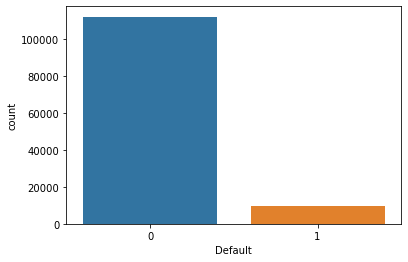

In [34]:
sns.countplot(x='Default', data=train_df)

In [35]:
train_df.fillna(value={'Phone_Change':0},inplace=True) # setting 0 as the default value
test_df.fillna(value={'Phone_Change':0},inplace=True)

In [36]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [37]:
train_df['Score_Source_3']

0                 NaN
1                 NaN
2         0.329655054
3         0.631354537
4         0.355638717
             ...     
121851    0.184116156
121852    0.406617437
121853            NaN
121854    0.077498546
121855     0.29859499
Name: Score_Source_3, Length: 121856, dtype: object

In [38]:
train_df[train_df['Score_Source_3'] == '&']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
28193,12105215,11250,0.0,1.0,1.0,1.0,0.0,26955,1836.45,Alone,...,3.0,18.0,Yes,Yes,Self-employed,0.302823,&,0.0,NaN,1


In [39]:
test_df[test_df['Score_Source_3'] == '#']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
41725,12232438,27000,0.0,0.0,1.0,0.0,0.0,67500,2514.6,Alone,...,2.0,6.0,12.0,Yes,Yes,XNA,0.566256849,#,2521.0,0.0
78068,12278755,20250,0.0,0.0,0.0,1.0,0.0,26955,2129.4,Alone,...,2.0,2.0,16.0,Yes,Yes,Self-employed,0.298427701,#,2333.0,0.0


In [40]:
train_df.drop(28193, inplace = True) # dropping the row with invalid value
test_df.drop([41725,78068], inplace = True)

In [41]:
score3_no_train = len(train_df[train_df['Score_Source_3'].notna()])
score3_no_test = len(test_df[test_df['Score_Source_3'].notna()])

In [42]:
train_df.fillna(value={'Score_Source_3':'0'},inplace=True) # setting 0 as the default value
test_df.fillna(value={'Score_Source_3':'0'},inplace=True)

In [43]:
train_df['Score_Source_3'] = train_df['Score_Source_3'].apply(lambda x:float(x))
test_df['Score_Source_3'] = test_df['Score_Source_3'].apply(lambda x:float(x))

In [44]:
score3_mean_train = train_df['Score_Source_3'].sum()/score3_no_train
score3_mean_test = test_df['Score_Source_3'].sum()/score3_no_test

In [45]:
train_df['Score_Source_3'] = train_df['Score_Source_3'].apply(lambda x:score3_mean_train if x == 0 else x) # replacing the default value with the average of the column
test_df['Score_Source_3'] = test_df['Score_Source_3'].apply(lambda x:score3_mean_test if x == 0 else x)

In [46]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [47]:
train_df[train_df['Score_Source_2'].isna()]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
37,12167766,32480.55,0.0,0.0,1.0,1.0,0.0,13500,675,Alone,...,3.0,15.0,No,Yes,Trade: type 2,NaN,0.434733,59.0,1.0,0
58,12160926,12150,0.0,0.0,1.0,0.0,0.0,80865,2473.2,Alone,...,2.0,7.0,Yes,Yes,XNA,NaN,0.528093,1560.0,6.0,0
71,12191159,7650,0.0,0.0,1.0,1.0,0.0,24750,1237.5,Alone,...,NaN,14.0,Yes,Yes,XNA,NaN,0.694093,1195.0,3.0,0
78,12181435,13500,1.0,1.0,1.0,1.0,0.0,31410,1644.3,Alone,...,4.0,9.0,Yes,Yes,Self-employed,NaN,0.372334,908.0,6.0,0
128,12180256,20250,0.0,0.0,1.0,1.0,0.0,78192,3299.85,Alone,...,4.0,16.0,Yes,No,Government,NaN,0.510090,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121746,12120678,13500,0.0,0.0,1.0,1.0,2.0,52128,3163.05,Relative,...,2.0,10.0,No,No,Business Entity Type 3,NaN,0.780144,415.0,1.0,0
121783,12142855,29250,1.0,0.0,1.0,1.0,0.0,53249.4,NaN,Alone,...,0.0,13.0,Yes,Yes,Business Entity Type 1,NaN,0.448962,0.0,0.0,0
121788,12119873,18000,0.0,NaN,1.0,1.0,1.0,117821.7,3457.8,Alone,...,4.0,12.0,Yes,Yes,Government,NaN,0.401407,1171.0,3.0,0
121813,12107988,NaN,0.0,0.0,1.0,1.0,0.0,67500,2615.4,Alone,...,5.0,19.0,Yes,No,Self-employed,NaN,0.511180,201.0,NaN,0


In [48]:
test_df[test_df['Score_Source_2']=='#']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
34558,12279735,4950,1.0,0.0,1.0,1.0,0.0,45000,2110.95,Partner,...,2.0,2.0,16.0,Yes,No,Self-employed,#,0.511575,1058.0,NaN


In [49]:
test_df.drop(34558,inplace=True)

In [50]:
score2_no_train = len(train_df[train_df['Score_Source_2'].notna()])
score2_no_test = len(test_df[test_df['Score_Source_2'].notna()])

In [51]:
train_df.fillna(value={'Score_Source_2':0},inplace=True) # setting 0 as the default value
test_df.fillna(value={'Score_Source_2':0},inplace=True)

In [52]:
train_df['Score_Source_2'] = train_df['Score_Source_2'].apply(lambda x:float(x))
test_df['Score_Source_2'] = test_df['Score_Source_2'].apply(lambda x:float(x))

In [53]:
score2_mean_train = train_df['Score_Source_2'].sum()/score2_no_train
score2_mean_test = test_df['Score_Source_2'].sum()/score2_no_test

In [54]:
train_df['Score_Source_2'] = train_df['Score_Source_2'].apply(lambda x:score2_mean_train if x == 0 else x) # replacing the default value with the average of the column
test_df['Score_Source_2'] = test_df['Score_Source_2'].apply(lambda x:score2_mean_test if x == 0 else x)

In [55]:
train_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,0.511180,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,3.0,10.0,Yes,Yes,Government,0.215068,0.511180,0.0,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,4.0,NaN,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,2.0,15.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,3.0,NaN,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,4.0,16.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,4.0,12.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,5.0,11.0,No,No,Trade: type 6,0.048079,0.511180,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,1.0,12.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,2.0,0


In [56]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Application_Process_Day     

In [57]:
train_df['Type_Organization'].unique()

array(['Self-employed', 'Government', 'XNA', 'Business Entity Type 3',
       'Other', nan, 'Industry: type 3', 'Business Entity Type 2',
       'Business Entity Type 1', 'Transport: type 4', 'Construction',
       'Kindergarten', 'Trade: type 3', 'Industry: type 2',
       'Trade: type 7', 'Trade: type 2', 'Agriculture', 'Military',
       'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11',
       'Bank', 'School', 'Industry: type 9', 'Postal', 'University',
       'Transport: type 2', 'Restaurant', 'Electricity', 'Police',
       'Industry: type 4', 'Security Ministries', 'Services',
       'Transport: type 3', 'Mobile', 'Hotel', 'Security',
       'Industry: type 7', 'Advertising', 'Cleaning', 'Realtor',
       'Trade: type 6', 'Culture', 'Industry: type 5', 'Telecom',
       'Trade: type 1', 'Industry: type 12', 'Industry: type 8',
       'Insurance', 'Emergency', 'Legal Services', 'Industry: type 10',
       'Trade: type 4', 'Industry: type 6', 'Transport: type 1',
   

In [58]:
train_df[train_df['Type_Organization'].isna()]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
14,12196064,22500,0.0,1.0,1.0,1.0,0.0,100424.7,4666.5,Alone,...,4.0,13.0,Yes,Yes,NaN,0.518641,0.583238,759.0,3.0,0
151,12203996,11250,0.0,1.0,0.0,1.0,3.0,22500,1516.5,Alone,...,4.0,13.0,Yes,Yes,NaN,0.203523,0.358951,0.0,0.0,1
293,12116854,18000,0.0,1.0,1.0,1.0,0.0,54000,2700,Alone,...,0.0,12.0,Yes,Yes,NaN,0.473621,0.511180,917.0,4.0,0
306,12133598,7650,0.0,1.0,0.0,1.0,2.0,12363.75,1147.05,Alone,...,2.0,10.0,Yes,Yes,NaN,0.358136,0.511180,204.0,NaN,1
311,12212121,11250,1.0,1.0,0.0,1.0,0.0,52128,2661.3,Relative,...,2.0,9.0,Yes,Yes,NaN,0.640479,0.511180,2073.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121764,12108438,22500,1.0,0.0,0.0,0.0,1.0,52128,2827.8,Alone,...,3.0,11.0,Yes,Yes,NaN,0.454566,0.318596,2689.0,0.0,0
121769,12150013,13500,0.0,0.0,0.0,1.0,1.0,74250,3355.2,Alone,...,6.0,7.0,Yes,No,NaN,0.332711,0.583238,0.0,0.0,0
121806,12169834,20250,0.0,0.0,0.0,1.0,0.0,111819.6,3282.3,Alone,...,4.0,10.0,Yes,Yes,NaN,0.598968,0.353988,3121.0,5.0,0
121815,12177386,14850,0.0,0.0,0.0,1.0,0.0,18000,900,Alone,...,3.0,NaN,Yes,Yes,NaN,0.636259,0.511180,757.0,NaN,0


In [59]:
train_df.fillna(value={'Type_Organization':'Other'},inplace=True) # replacing the null value with a default value
test_df.fillna(value={'Type_Organization':'Other'},inplace=True)

In [60]:
info['Description'][29]

'hour of the day on which client applied for the loan'

In [61]:
train_df.drop('Application_Process_Hour', axis=1, inplace=True) # dropping irrelevant columns
train_df.drop('Application_Process_Day', axis=1, inplace=True)
test_df.drop('Application_Process_Hour', axis=1, inplace=True)
test_df.drop('Application_Process_Day', axis=1, inplace=True)

In [62]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Client_Permanent_Match_Tag  

In [63]:
info['Description'][20]

'Days before the loan application, the client changed his/her identity document with which the loan was applied'

In [64]:
train_df.fillna(value={'ID_Days':'x'},inplace=True) # replacing null values with a default value
test_df.fillna(value={'ID_Days':'x'},inplace=True)

In [65]:
train_df['ID_Days'] = train_df['ID_Days'].apply(lambda x:0 if x == 'x' else float(x)) # converting the values to float
test_df['ID_Days'] = test_df['ID_Days'].apply(lambda x:0 if x == 'x' else float(x)) 

In [66]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Client_City_Rating             2409
Client_Permanent_Match_Tag  

In [67]:
train_df['Client_City_Rating'].unique()

array([ 2.,  3.,  1., nan])

In [68]:
info['Description'][27]

'Client city rating. 3 denotes best and 2 denotes good and 1 denotes average'

In [69]:
test_df.rename(columns={'Cleint_City_Rating':'Client_City_Rating'}, inplace=True)

In [70]:
train_df.fillna(value={'Client_City_Rating':0},inplace=True) # replacing the null values with 0
test_df.fillna(value={'Client_City_Rating':0},inplace=True)

In [71]:
train_df['Client_Family_Members'].unique()

array([ 2.,  4.,  1.,  3., nan,  5.,  6.,  7.,  9., 10., 12.,  8., 13.,
       14., 16., 15.])

In [72]:
info['Description'][26]

'Number of family members does client have'

In [73]:
train_df.drop('Client_Family_Members',axis=1, inplace=True) # dropping irrelevant column
test_df.drop('Client_Family_Members',axis=1, inplace=True)

In [74]:
train_df['Registration_Days']

0         6123
1         7833
2          NaN
3          NaN
4         5516
          ... 
121851    2661
121852     902
121853    3980
121854     895
121855    8679
Name: Registration_Days, Length: 121855, dtype: object

In [75]:
info['Description'][19]

'Days before the loan application, the client changed his/her registration'

In [76]:
train_df[train_df['Registration_Days'] == '0']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
2026,12184104,27000,1.0,0.0,1.0,0.0,0.0,NaN,2950.65,Alone,...,Drivers,2.0,No,Yes,Business Entity Type 3,0.657966,0.511180,2943.0,NaN,0
6876,12195249,12150,0.0,1.0,1.0,1.0,4.0,112500,3289.5,Alone,...,Core,2.0,Yes,Yes,Kindergarten,0.308919,0.581484,1399.0,5.0,0
10040,12220943,11385,0.0,0.0,1.0,1.0,0.0,69980.85,2775.15,Alone,...,Other,2.0,Yes,Yes,XNA,0.698255,0.511180,1614.0,NaN,0
14309,12111245,20250,0.0,1.0,0.0,0.0,0.0,52128,4793.85,Alone,...,Laborers,2.0,Yes,Yes,Business Entity Type 3,0.481074,0.511180,0.0,5.0,0
15397,12169904,20250,0.0,0.0,1.0,1.0,1.0,50326.65,5432.85,Relative,...,Core,2.0,Yes,Yes,Government,0.473872,0.181959,0.0,1.0,0
17164,12207334,9000,0.0,1.0,0.0,0.0,0.0,59256,3227.4,Alone,...,Other,2.0,Yes,No,Trade: type 7,0.219104,0.511180,0.0,NaN,1
20595,12111511,18000,0.0,1.0,0.0,1.0,0.0,80865,2621.7,Alone,...,Laborers,2.0,Yes,Yes,Other,0.043864,0.511180,0.0,0.0,0
26937,12201162,22500,0.0,0.0,1.0,0.0,0.0,114750,3368.25,Alone,...,Other,2.0,Yes,Yes,Business Entity Type 3,0.545773,0.533482,1658.0,1.0,0
32599,12179100,4230,0.0,0.0,0.0,1.0,0.0,26368.65,1485.45,Partner,...,Other,3.0,Yes,Yes,XNA,0.202642,0.511180,671.0,0.0,0
33625,12219083,15750,1.0,1.0,0.0,1.0,0.0,24750,1433.7,Alone,...,Other,2.0,Yes,Yes,Bank,0.637402,0.320163,806.0,NaN,0


In [77]:
train_df[train_df['Age_Days'].isna()]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
8,12159147,13500,1.0,1.0,0.0,1.0,1.0,45000,1200.15,Relative,...,Sales,2.0,Yes,Yes,Self-employed,0.637594,0.553165,1611.0,0.0,0
19,12186490,9000,0.0,0.0,0.0,0.0,0.0,22500,2191.95,Alone,...,Sales,2.0,Yes,Yes,Business Entity Type 2,0.418630,0.595456,2458.0,2.0,0
43,12217522,9000,1.0,0.0,0.0,1.0,0.0,9000,NaN,Relative,...,Core,2.0,Yes,No,Industry: type 2,0.508863,0.511180,1134.0,0.0,0
44,12214917,22500,0.0,0.0,0.0,1.0,0.0,82567.35,3511.35,Relative,...,Other,1.0,Yes,Yes,XNA,0.536978,0.270707,48.0,0.0,0
53,12183711,22500,1.0,0.0,1.0,1.0,2.0,50326.65,4915.8,Alone,...,Accountants,2.0,Yes,Yes,Self-employed,0.600711,0.334454,823.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121709,12192203,32400,NaN,1.0,1.0,1.0,0.0,89138.7,2958.75,Alone,...,Managers,2.0,Yes,Yes,Kindergarten,0.437736,0.517297,0.0,1.0,0
121715,12178730,54000,1.0,0.0,0.0,1.0,0.0,70200,3753,Alone,...,Other,2.0,Yes,Yes,Police,0.647443,0.758393,2477.0,1.0,0
121732,12182871,15750,0.0,0.0,0.0,0.0,0.0,67500,2514.6,Alone,...,Core,2.0,Yes,Yes,Government,0.630118,0.746300,652.0,0.0,0
121749,12187403,5400,0.0,0.0,1.0,0.0,NaN,28440,1396.35,Alone,...,Core,3.0,Yes,No,Security,0.317916,0.511180,1133.0,NaN,1


In [78]:
train_df['Age_Days']

0         13957
1         14162
2         16790
3         23195
4         11366
          ...  
121851    12889
121852     8648
121853     9152
121854    10290
121855    14772
Name: Age_Days, Length: 121855, dtype: object

In [79]:
train_df['Population_Region_Relative']

0         0.028663
1         0.008575
2           0.0228
3         0.010556
4         0.020713
            ...   
121851    0.031329
121852    0.018209
121853    0.008068
121854    0.028663
121855    0.018029
Name: Population_Region_Relative, Length: 121855, dtype: object

In [80]:
info['Description'][16]

'Relative population of the region where the client is living. Higher value means the client is living in more populated area'

In [81]:
train_df['Population_Region_Relative'].unique()

array(['0.028663', '0.008575', '0.0228', '0.010556', '0.020713',
       '0.019101', '0.016612', '0.009175', '0.006008', '0.001417',
       '0.018634', '0.00963', '0.003541', '0.008068', '0.005144',
       '0.04622', '0.008866', nan, '0.019689', '0.032561', '0.006852',
       '0.020246', '0.035792', '0.010147', '0.018801', '0.00733',
       '0.010276', '0.015221', '0.01452', '0.018209', '0.010006',
       '0.072508', '0.026392', '0.006671', '0.018029', '0.00496',
       '0.014464', '0.007114', '0.00712', '0.0105', '0.008019',
       '0.031329', '0.008474', '0.010643', '0.011657', '0.003069',
       '0.022625', '0.006305', '0.02461', '0.025164', '0.009657',
       '0.009549', '0.002042', '0.030755', '0.010032', '0.008625',
       '0.010966', '0.011703', '0.00702', '0.006629', '0.005084',
       '0.009334', '0.005313', '0.01885', '0.007274', '0.007305',
       '0.002134', '0.00823', '0.006296', '0.003818', '0.006233',
       '0.002506', '0.006207', '0.003122', '0.005002', '0.003813',
    

In [82]:
test_df['Population_Region_Relative'].unique()

array(['0.019101', '0.0105', '0.032561', '0.01452', '0.008625',
       '0.031329', nan, '0.072508', '0.007305', '0.018209', '0.010006',
       '0.0228', '0.006629', '0.035792', '0.003818', '0.010643',
       '0.018801', '0.00496', '0.025164', '0.009657', '0.00823',
       '0.016612', '0.014464', '0.022625', '0.018029', '0.006852',
       '0.015221', '0.020713', '0.026392', '0.005144', '0.028663',
       '0.006671', '0.007114', '0.04622', '0.011703', '0.010032',
       '0.020246', '0.00702', '0.010966', '0.008474', '0.009334',
       '0.02461', '0.010147', '0.005313', '0.008019', '0.018634',
       '0.008866', '0.009549', '0.003122', '0.010276', '0.006207',
       '0.011657', '0.00712', '0.008068', '0.019689', '0.006008',
       '0.003541', '0.010556', '0.030755', '0.01885', '0.00963',
       '0.009175', '0.003813', '0.00733', '0.002134', '0.004849',
       '0.003069', '0.007274', '0.005002', '0.006305', '0.002506',
       '0.006233', '0.002042', '0.008575', '0.001417', '0.001276',
    

In [83]:
train_df.fillna(value={'Population_Region_Relative':'@'},inplace=True) # replacing null value with a default value
test_df.fillna(value={'Population_Region_Relative':'@'},inplace=True)

In [84]:
train_df[(train_df['Population_Region_Relative'] == '#') | (train_df['Population_Region_Relative'] == '@')]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
19,12186490,9000,0.0,0.0,0.0,0.0,0.0,22500,2191.95,Alone,...,Sales,2.0,Yes,Yes,Business Entity Type 2,0.418630,0.595456,2458.0,2.0,0
40,12117444,13950,0.0,0.0,1.0,1.0,0.0,80865,2621.7,Alone,...,Other,3.0,No,No,Business Entity Type 2,0.215908,0.392774,65.0,2.0,0
43,12217522,9000,1.0,0.0,0.0,1.0,0.0,9000,NaN,Relative,...,Core,2.0,Yes,No,Industry: type 2,0.508863,0.511180,1134.0,0.0,0
54,12172556,11250,0.0,0.0,1.0,1.0,1.0,64008,3113.1,Alone,...,Other,3.0,Yes,No,Transport: type 4,0.413540,0.605836,644.0,0.0,0
159,12104033,22500,1.0,0.0,0.0,1.0,2.0,55255.5,2834.1,Alone,...,Laborers,2.0,Yes,Yes,Self-employed,0.526530,0.617826,621.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121823,12129827,13500,1.0,0.0,1.0,1.0,0.0,80865,2377.35,Alone,...,Sales,2.0,Yes,Yes,Business Entity Type 3,0.578204,0.796973,519.0,3.0,0
121827,12114319,15750,1.0,0.0,0.0,1.0,0.0,135534.6,3575.25,Alone,...,Other,2.0,Yes,Yes,Self-employed,0.286528,0.538863,3.0,0.0,0
121842,12102970,9000,0.0,0.0,1.0,1.0,0.0,16810.2,1650.6,Alone,...,Other,3.0,Yes,Yes,XNA,0.706519,0.511180,0.0,NaN,0
121845,12213772,25650,0.0,0.0,1.0,1.0,0.0,97128,5187.6,Alone,...,Laborers,2.0,Yes,Yes,Industry: type 5,0.612711,0.691021,1209.0,0.0,0


In [85]:
test_df[(test_df['Population_Region_Relative'] == '#') | (test_df['Population_Region_Relative'] == '@')]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Workphone_Working,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau
7,12250293,13500,0.0,0.0,0.0,1.0,0.0,94500,2776.05,Alone,...,0,Laborers,2.0,Yes,Yes,Business Entity Type 3,0.761308,0.517297,495.0,1.0
46,12261764,13050,0.0,0.0,0.0,1.0,0.0,25470,2532.15,Alone,...,1,Other,2.0,Yes,Yes,XNA,0.732709,0.511575,2914.0,NaN
84,12276057,18000,0.0,1.0,0.0,1.0,0.0,26955,1889.1,Alone,...,0,Other,1.0,Yes,Yes,XNA,0.743429,0.547810,584.0,1.0
104,12276351,13500,0.0,0.0,1.0,1.0,0.0,27000,1350,Alone,...,0,Core,2.0,Yes,Yes,Other,0.695664,0.511575,833.0,4.0
105,12224845,15750,0.0,0.0,1.0,1.0,0.0,102474,4942.8,Alone,...,0,Sales,1.0,Yes,No,Trade: type 3,0.704183,0.164414,2429.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80773,12217899,13500,0.0,1.0,1.0,1.0,0.0,87873.3,2569.05,Alone,...,0,Other,3.0,Yes,No,Agriculture,0.091680,0.511575,0.0,NaN
80783,12256611,5400,0.0,1.0,1.0,0.0,0.0,15830.1,1555.2,Alone,...,0,Other,2.0,Yes,Yes,XNA,0.265312,0.511575,0.0,0.0
80813,12274313,11250,0.0,1.0,0.0,0.0,0.0,49752,3930.75,Alone,...,1,Drivers,2.0,Yes,No,Military,0.207658,0.701696,661.0,1.0
80861,12240337,9000,0.0,NaN,0.0,1.0,0.0,75474,2434.5,Others,...,0,Laborers,2.0,Yes,Yes,Business Entity Type 2,0.073299,0.537070,544.0,2.0


In [86]:
train_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Sales,2.0,Yes,Yes,Self-employed,0.478787,0.511180,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Other,2.0,Yes,Yes,Government,0.215068,0.511180,0.0,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Realty agents,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Other,3.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Laborers,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Laborers,2.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Sales,3.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,High skill tech,3.0,No,No,Trade: type 6,0.048079,0.511180,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Sales,2.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,2.0,0


In [87]:
train_df.drop('Population_Region_Relative', axis=1, inplace=True) # dropping irrelevant feature
test_df.drop('Population_Region_Relative', axis=1, inplace=True)

In [88]:
train_df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type                0
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization           

In [89]:
train_df['Client_Housing_Type'].unique()

array(['Home', 'Family', 'Office', 'Municipal', nan, 'Rental', 'Shared'],
      dtype=object)

<AxesSubplot:xlabel='Client_Housing_Type', ylabel='count'>

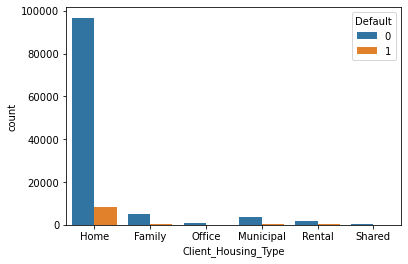

In [90]:
sns.countplot(hue='Default',x = 'Client_Housing_Type', data=train_df.dropna(subset='Client_Housing_Type'))

In [91]:
paid = train_df[train_df['Default'] == 0].groupby('Client_Housing_Type').count()['Default']
not_paid = train_df[train_df['Default'] == 1].groupby('Client_Housing_Type').count()['Default']
print(paid/(paid+not_paid))

Client_Housing_Type
Family       0.887602
Home         0.922150
Municipal    0.911252
Office       0.932136
Rental       0.873899
Shared       0.900000
Name: Default, dtype: float64


In [92]:
train_df.fillna(value={'Client_Housing_Type':'Other'}, inplace=True) # replacing null values with a default value
test_df.fillna(value={'Client_Housing_Type':'Other'}, inplace=True)

In [93]:
train_df['Loan_Contract_Type'].unique()

array(['CL', 'RL', nan], dtype=object)

In [94]:
info

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for th...
3,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
4,Active_Loan,Any other active loan at the time of aplicatio...
5,House_Own,Any house owned by client (0 means No and 1 me...
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied...


In [95]:
train_df.dropna(subset='Loan_Contract_Type', inplace=True) # dropping rows with null values in Loan_Contract_Type column
test_df.dropna(subset='Loan_Contract_Type', inplace=True)

In [96]:
train_df.isna().sum()

ID                                0
Client_Income                  3500
Car_Owned                      3482
Bike_Owned                     3504
Active_Loan                    3536
House_Own                      3550
Child_Count                    3530
Credit_Amount                  3518
Loan_Annuity                   4652
Accompany_Client               1699
Client_Income_Type                0
Client_Education               3546
Client_Marital_Status          3372
Client_Gender                  2338
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3482
Employed_Days                  3549
Registration_Days              3505
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization           

<AxesSubplot:xlabel='Client_Gender', ylabel='count'>

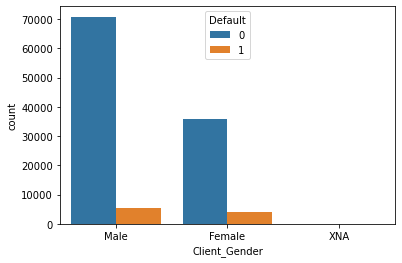

In [97]:
sns.countplot(hue='Default',x = 'Client_Gender', data=train_df.dropna(subset='Client_Gender'))

In [98]:
train_df['Client_Gender'].unique()

array(['Male', 'Female', nan, 'XNA'], dtype=object)

In [99]:
train_df.fillna(value={'Client_Gender':'XNA'}, inplace=True) # replacing null values with a default value
test_df.fillna(value={'Client_Gender':'XNA'}, inplace=True)

In [100]:
train_df.isna().sum()

ID                                0
Client_Income                  3500
Car_Owned                      3482
Bike_Owned                     3504
Active_Loan                    3536
House_Own                      3550
Child_Count                    3530
Credit_Amount                  3518
Loan_Annuity                   4652
Accompany_Client               1699
Client_Income_Type                0
Client_Education               3546
Client_Marital_Status          3372
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3482
Employed_Days                  3549
Registration_Days              3505
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization           

In [101]:
train_df['Client_Marital_Status'].unique()

array(['M', 'W', 'S', nan, 'D'], dtype=object)

In [102]:
train_df.drop('Client_Marital_Status', axis=1, inplace=True) # dropping irrelevant feature
test_df.drop('Client_Marital_Status', axis=1, inplace=True)

In [103]:
train_df['Client_Education'].unique()

array(['Secondary', 'Graduation', 'Graduation dropout', nan,
       'Junior secondary', 'Post Grad'], dtype=object)

<AxesSubplot:xlabel='Client_Education', ylabel='count'>

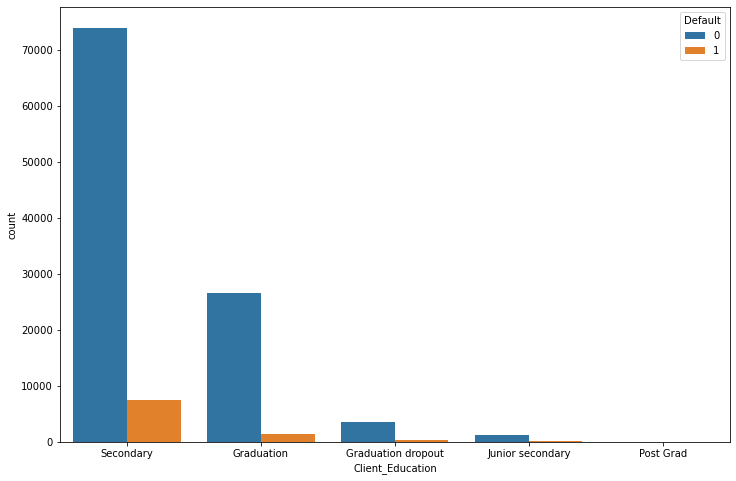

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(hue='Default',x = 'Client_Education', data=train_df.dropna(subset='Client_Education'))

In [105]:
paid = train_df[train_df['Default'] == 0].groupby('Client_Education').count()['Default']
not_paid = train_df[train_df['Default'] == 1].groupby('Client_Education').count()['Default']
print(paid/(paid+not_paid))

Client_Education
Graduation            0.949637
Graduation dropout    0.917164
Junior secondary      0.894143
Post Grad             0.984375
Secondary             0.909091
Name: Default, dtype: float64


In [106]:
train_df.fillna(value={'Client_Education':'NA'}, inplace=True) # replacing null value with a default value
test_df.fillna(value={'Client_Education':'NA'}, inplace=True)

In [107]:
train_df.isna().sum()

ID                                0
Client_Income                  3500
Car_Owned                      3482
Bike_Owned                     3504
Active_Loan                    3536
House_Own                      3550
Child_Count                    3530
Credit_Amount                  3518
Loan_Annuity                   4652
Accompany_Client               1699
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3482
Employed_Days                  3549
Registration_Days              3505
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2              

In [108]:
train_df['Accompany_Client']

0            Alone
1            Alone
2            Alone
3            Alone
4            Alone
            ...   
121851    Relative
121852       Alone
121853       Alone
121854       Alone
121855       Alone
Name: Accompany_Client, Length: 118204, dtype: object

In [109]:
info['Description'][9]

'Who accompanied the client when client applied for the loan'

In [110]:
train_df.drop('Accompany_Client', axis=1, inplace=True) # dropping irrelevant feature
test_df.drop('Accompany_Client', axis=1, inplace=True)

In [111]:
train_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,...,Client_Occupation,Client_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Sales,2.0,Yes,Yes,Self-employed,0.478787,0.511180,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,...,Other,2.0,Yes,Yes,Government,0.215068,0.511180,0.0,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Realty agents,2.0,Yes,Yes,Self-employed,0.552795,0.329655,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,...,Other,3.0,Yes,Yes,XNA,0.135182,0.631355,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,...,Laborers,1.0,Yes,Yes,Business Entity Type 3,0.301182,0.355639,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,...,Laborers,2.0,Yes,No,Business Entity Type 2,0.173527,0.184116,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,...,Sales,3.0,Yes,Yes,Self-employed,0.371559,0.406617,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,...,High skill tech,3.0,No,No,Trade: type 6,0.048079,0.511180,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,...,Sales,2.0,Yes,Yes,Business Entity Type 3,0.103538,0.077499,0.0,2.0,0


In [112]:
annuity_len_train = train_df['Loan_Annuity'].dropna().shape[0]
annuity_len_test = test_df['Loan_Annuity'].dropna().shape[0]

In [113]:
train_df.fillna(value={'Loan_Annuity':'0'}, inplace=True) # replacing null value with 0
test_df.fillna(value={'Loan_Annuity':'0'}, inplace=True)

In [114]:
train_df['Loan_Annuity'] = train_df['Loan_Annuity'].apply(lambda x:0 if ((x == '$') | (x == '#VALUE!')) else float(x)) # converting the value to float datatype
test_df['Loan_Annuity'] = test_df['Loan_Annuity'].apply(lambda x:0 if ((x == '$') | (x == '#VALUE!')) else float(x))

In [115]:
annuity_mean_train = train_df['Loan_Annuity'].sum()/annuity_len_train
annuity_mean_test = test_df['Loan_Annuity'].sum()/annuity_len_test

In [116]:
train_df['Loan_Annuity'] = train_df['Loan_Annuity'].apply(lambda x:annuity_mean_train if x == 0 else x) # replacing the default values with the mean value
test_df['Loan_Annuity'] = test_df['Loan_Annuity'].apply(lambda x:annuity_mean_test if x == 0 else x) 

In [117]:
train_df.isna().sum()

ID                                0
Client_Income                  3500
Car_Owned                      3482
Bike_Owned                     3504
Active_Loan                    3536
House_Own                      3550
Child_Count                    3530
Credit_Amount                  3518
Loan_Annuity                      0
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3482
Employed_Days                  3549
Registration_Days              3505
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2                    0
Score_Source_3              

In [118]:
train_df['Credit_Amount']

0         61190.55
1            15282
2         59527.35
3          53870.4
4         133988.4
            ...   
121851      107820
121852      104256
121853     55107.9
121854       45000
121855    62428.95
Name: Credit_Amount, Length: 118204, dtype: object

In [119]:
info['Description'][7]

'Credit amount of the loan in $'

In [120]:
train_df.dropna(subset='Credit_Amount', inplace=True) # dropping rows with null values in Credit_Amount column
test_df.dropna(subset='Credit_Amount', inplace=True)

In [121]:
train_df.drop('Child_Count', axis=1, inplace=True) # dropping irrelevant feature
test_df.drop('Child_Count', axis=1, inplace=True)

In [122]:
train_df.isna().sum()

ID                                0
Client_Income                  3398
Car_Owned                      3395
Bike_Owned                     3405
Active_Loan                    3423
House_Own                      3438
Credit_Amount                     0
Loan_Annuity                      0
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3387
Employed_Days                  3443
Registration_Days              3394
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2                    0
Score_Source_3                    0
Phone_Change                

In [123]:
train_df['House_Own'].unique()

array([ 0., nan,  1.])

In [124]:
train_df.fillna(value={'Bike_Owned':0, 'Car_Owned':0, 'Active_Loan':0, 'House_Own':0}, inplace=True)
test_df.fillna(value={'Bike_Owned':0, 'Car_Owned':0, 'Active_Loan':0, 'House_Own':0}, inplace=True)

In [125]:
train_df['Active_Loan'].unique()

array([1., 0.])

In [126]:
train_df.isna().sum()

ID                                0
Client_Income                  3398
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Credit_Amount                     0
Loan_Annuity                      0
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3387
Employed_Days                  3443
Registration_Days              3394
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2                    0
Score_Source_3                    0
Phone_Change                

In [127]:
train_df['Client_Income_Type'].unique()

array(['Commercial', 'Service', 'Retired', 'Govt Job', 'Other', 'Student',
       'Unemployed', 'Maternity leave', 'Businessman'], dtype=object)

In [128]:
train_df.fillna(value={'Client_Income':'0'}, inplace=True) # replacing null values with 0
test_df.fillna(value={'Client_Income':'0'}, inplace=True)

train_df['Client_Income'] = train_df['Client_Income'].apply(lambda x:0 if x == '$' else float(x)) # converting the values to float
test_df['Client_Income'] = test_df['Client_Income'].apply(lambda x:0 if x == '$' else float(x))

In [129]:
mean_income_train = train_df.groupby('Client_Income_Type')['Client_Income'].mean()
mean_income_test = test_df.groupby('Client_Income_Type')['Client_Income'].mean()

In [130]:
def client_income(income_type, income, mean_income):
    if income == 0:
        return mean_income[income_type]
    return income

In [131]:
train_df['Client_Income'] = train_df.apply(lambda x: client_income(x['Client_Income_Type'], x['Client_Income'], mean_income_train), axis=1) # replacing the default income value based on the income type of the client
test_df['Client_Income'] = test_df.apply(lambda x: client_income(x['Client_Income_Type'], x['Client_Income'], mean_income_test), axis=1)

In [132]:
train_df.isna().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Credit_Amount                     0
Loan_Annuity                      0
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                       3387
Employed_Days                  3443
Registration_Days              3394
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2                    0
Score_Source_3                    0
Phone_Change                

In [133]:
train_df['Age_Days']

0         13957
1         14162
2         16790
3         23195
4         11366
          ...  
121851    12889
121852     8648
121853     9152
121854    10290
121855    14772
Name: Age_Days, Length: 114686, dtype: object

In [134]:
info['Description'][17]

'Age of the client at the time of application submission'

In [135]:
info['Description'][18]

'Days before the application, the client started earning'

In [136]:
info['Description'][19]

'Days before the loan application, the client changed his/her registration'

In [137]:
age_len_train = len(train_df['Age_Days'].dropna())
age_len_test = len(test_df['Age_Days'].dropna())

train_df.fillna(value={'Age_Days':'0'}, inplace=True) # replacing the null values with 0
test_df.fillna(value={'Age_Days':'0'}, inplace=True)

In [138]:
train_df['Age_Days'] = train_df['Age_Days'].apply(lambda x:0 if x == 'x' else float(x)) # converting the value to float
test_df['Age_Days'] = test_df['Age_Days'].apply(lambda x:0 if x == 'x' else float(x)) 

In [139]:
train_df['Age_Days']

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 114686, dtype: float64

In [140]:
age_mean_train = train_df['Age_Days'].sum()/age_len_train
age_mean_test = test_df['Age_Days'].sum()/age_len_test

In [141]:
train_df['Age_Days'] = train_df['Age_Days'].apply(lambda x:age_mean_train if x == 0 else x) # replacing the default value with the mean value of the column
test_df['Age_Days'] = test_df['Age_Days'].apply(lambda x:age_mean_test if x == 0 else x) 

In [142]:
train_df.isna().sum()

ID                                0
Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Credit_Amount                     0
Loan_Annuity                      0
Client_Income_Type                0
Client_Education                  0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Age_Days                          0
Employed_Days                  3443
Registration_Days              3394
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_City_Rating                0
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2                    0
Score_Source_3                    0
Phone_Change                

In [143]:
train_df['Credit_Bureau']

0         NaN
1         NaN
2         0.0
3         3.0
4         1.0
         ... 
121851    1.0
121852    0.0
121853    NaN
121854    2.0
121855    0.0
Name: Credit_Bureau, Length: 114686, dtype: float64

In [144]:
train_df.fillna(value={'Credit_Bureau':0},inplace=True)
test_df.fillna(value={'Credit_Bureau':0},inplace=True)

In [145]:
train_df.isna().sum()

ID                               0
Client_Income                    0
Car_Owned                        0
Bike_Owned                       0
Active_Loan                      0
House_Own                        0
Credit_Amount                    0
Loan_Annuity                     0
Client_Income_Type               0
Client_Education                 0
Client_Gender                    0
Loan_Contract_Type               0
Client_Housing_Type              0
Age_Days                         0
Employed_Days                 3443
Registration_Days             3394
ID_Days                          0
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_City_Rating               0
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization                0
Score_Source_2                   0
Score_Source_3                   0
Phone_Change                     0
Credit_Bureau       

In [146]:
info['Description'][19]

'Days before the loan application, the client changed his/her registration'

In [147]:
train_df.drop('Registration_Days',axis=1, inplace=True) # dropping irrelevant feature
test_df.drop('Registration_Days',axis=1, inplace=True)

In [148]:
train_df.isna().sum()

ID                               0
Client_Income                    0
Car_Owned                        0
Bike_Owned                       0
Active_Loan                      0
House_Own                        0
Credit_Amount                    0
Loan_Annuity                     0
Client_Income_Type               0
Client_Education                 0
Client_Gender                    0
Loan_Contract_Type               0
Client_Housing_Type              0
Age_Days                         0
Employed_Days                 3443
ID_Days                          0
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_City_Rating               0
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization                0
Score_Source_2                   0
Score_Source_3                   0
Phone_Change                     0
Credit_Bureau                    0
Default             

In [149]:
train_df['Employed_Days']

0           1062
1           4129
2           5102
3         365243
4           2977
           ...  
121851      2863
121852       636
121853      1623
121854       847
121855       498
Name: Employed_Days, Length: 114686, dtype: object

In [150]:
float(np.nan)

nan

In [151]:
train_df['Employed_Days'] = train_df['Employed_Days'].apply(lambda x: np.nan if x == 'x' else float(x)) # converting the values to float
test_df['Employed_Days'] = test_df['Employed_Days'].apply(lambda x: np.nan if x == 'x' else float(x))

In [152]:
train_df.fillna(value={'Employed_Days':0}, inplace=True) # replacing null value with 0
test_df.fillna(value={'Employed_Days':0}, inplace=True)

In [153]:
age_info_train = train_df['Age_Days'].describe()
age_info_test = test_df['Age_Days'].describe()

In [154]:
train_df['Age_Days']

0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 114686, dtype: float64

In [155]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [156]:
train_df.iat[36,14]

0.0

In [157]:
train_df.columns[13]

'Age_Days'

In [158]:
train_df.columns[14]

'Employed_Days'

In [159]:
train_df[['Employed_Days','Age_Days']]

,Employed_Days,Age_Days
0,1062.0,13957.0
1,4129.0,14162.0
2,5102.0,16790.0
3,365243.0,23195.0
4,2977.0,11366.0
...,...,...
114681,2863.0,12889.0
114682,636.0,8648.0
114683,1623.0,9152.0
114684,847.0,10290.0


In [160]:
emp1, emp2, emp3, emp4 = [0,0],[0,0],[0,0],[0,0]
for i in range(len(train_df['Age_Days'])):
    age = train_df.iat[i,13]
    if age < age_info_train['25%']:
        emp1[0] += train_df.iat[i,14]
        emp1[1] += 1
    elif age < age_info_train['50%']:
        emp2[0] += train_df.iat[i,14]
        emp2[1] += 1
    elif age < age_info_train['75%']:
        emp3[0] += train_df.iat[i,14]
        emp3[1] += 1
    elif age <= age_info_train['max']:
        emp4[0] += train_df.iat[i,14]
        emp4[1] += 1

In [161]:
emp1_mean = emp1[0]/emp1[1]
emp2_mean = emp2[0]/emp2[1]
emp3_mean = emp3[0]/emp3[1]
emp4_mean = emp4[0]/emp4[1]
print(emp1_mean)
print(emp2_mean)
print(emp3_mean)
print(emp4_mean)

2415.1344168526784
5773.816434724983
27539.194397934978
224824.92153443766


In [162]:
def emp_na(age,emp,age_info):
    if emp == 0:
        if age < age_info['25%']:
            return emp1_mean
        elif age < age_info['50%']:
            return emp2_mean
        elif age < age_info['75%']:
            return emp3_mean
        elif age <= age_info['max']:
            return emp4_mean
    return emp

In [163]:
train_df['Employed_Days'] = train_df.apply(lambda x: emp_na(x['Age_Days'], x['Employed_Days'], age_info_train), axis=1) # replacing the default value of employeed days 

In [164]:
emp1, emp2, emp3, emp4 = [0,0],[0,0],[0,0],[0,0]
for i in range(len(test_df['Age_Days'])):
    age = test_df.iat[i,13]
    if age < age_info_test['25%']:
        emp1[0] += test_df.iat[i,14]
        emp1[1] += 1
    elif age < age_info_test['50%']:
        emp2[0] += test_df.iat[i,14]
        emp2[1] += 1
    elif age < age_info_test['75%']:
        emp3[0] += test_df.iat[i,14]
        emp3[1] += 1
    elif age <= age_info_test['max']:
        emp4[0] += test_df.iat[i,14]
        emp4[1] += 1

In [165]:
emp1_mean = emp1[0]/emp1[1]
emp2_mean = emp2[0]/emp2[1]
emp3_mean = emp3[0]/emp3[1]
emp4_mean = emp4[0]/emp4[1]
print(emp1_mean)
print(emp2_mean)
print(emp3_mean)
print(emp4_mean)

2337.250497642745
6153.1333158721845
29138.003719029908
227375.4249947622


In [166]:
test_df['Employed_Days'] = test_df.apply(lambda x: emp_na(x['Age_Days'], x['Employed_Days'], age_info_test), axis=1) # replacing the default value of employeed days 

In [167]:
train_df.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Credit_Amount                 0
Loan_Annuity                  0
Client_Income_Type            0
Client_Education              0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Age_Days                      0
Employed_Days                 0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_City_Rating            0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Score_Source_3                0
Phone_Change                  0
Credit_Bureau                 0
Default                       0
dtype: int64

In [168]:
test_df.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Credit_Amount                 0
Loan_Annuity                  0
Client_Income_Type            0
Client_Education              0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Age_Days                      0
Employed_Days                 0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_City_Rating            0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Score_Source_3                0
Phone_Change                  0
Credit_Bureau                 0
dtype: int64

In [169]:
for i in train_df.columns:
    print(i,train_df[i].dtype)

ID int64
Client_Income float64
Car_Owned float64
Bike_Owned float64
Active_Loan float64
House_Own float64
Credit_Amount object
Loan_Annuity float64
Client_Income_Type object
Client_Education object
Client_Gender object
Loan_Contract_Type object
Client_Housing_Type object
Age_Days float64
Employed_Days float64
ID_Days float64
Mobile_Tag int64
Homephone_Tag int64
Workphone_Working int64
Client_Occupation object
Client_City_Rating float64
Client_Permanent_Match_Tag object
Client_Contact_Work_Tag object
Type_Organization object
Score_Source_2 float64
Score_Source_3 float64
Phone_Change float64
Credit_Bureau float64
Default int64


In [170]:
train_df['Credit_Amount'] = train_df['Credit_Amount'].apply(lambda x:np.nan if x == '$' else float(x)) # converting the values to float
test_df['Credit_Amount'] = test_df['Credit_Amount'].apply(lambda x:np.nan if x == '$' else float(x))

In [171]:
train_df.dropna(subset='Credit_Amount', inplace=True) # dropping rows with null values in Credit_Amount column
test_df.dropna(subset='Credit_Amount', inplace=True)

In [172]:
train_df.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Credit_Amount                 0
Loan_Annuity                  0
Client_Income_Type            0
Client_Education              0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Age_Days                      0
Employed_Days                 0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_City_Rating            0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Score_Source_3                0
Phone_Change                  0
Credit_Bureau                 0
Default                       0
dtype: int64

In [173]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [174]:
for i in train_df.columns:
    print(i,train_df[i].dtype)

ID int64
Client_Income float64
Car_Owned float64
Bike_Owned float64
Active_Loan float64
House_Own float64
Credit_Amount float64
Loan_Annuity float64
Client_Income_Type object
Client_Education object
Client_Gender object
Loan_Contract_Type object
Client_Housing_Type object
Age_Days float64
Employed_Days float64
ID_Days float64
Mobile_Tag int64
Homephone_Tag int64
Workphone_Working int64
Client_Occupation object
Client_City_Rating float64
Client_Permanent_Match_Tag object
Client_Contact_Work_Tag object
Type_Organization object
Score_Source_2 float64
Score_Source_3 float64
Phone_Change float64
Credit_Bureau float64
Default int64


In [175]:
for i in test_df.columns:
    print(i,test_df[i].dtype)

ID int64
Client_Income float64
Car_Owned float64
Bike_Owned float64
Active_Loan float64
House_Own float64
Credit_Amount float64
Loan_Annuity float64
Client_Income_Type object
Client_Education object
Client_Gender object
Loan_Contract_Type object
Client_Housing_Type object
Age_Days float64
Employed_Days float64
ID_Days float64
Mobile_Tag int64
Homephone_Tag int64
Workphone_Working int64
Client_Occupation object
Client_City_Rating float64
Client_Permanent_Match_Tag object
Client_Contact_Work_Tag object
Type_Organization object
Score_Source_2 float64
Score_Source_3 float64
Phone_Change float64
Credit_Bureau float64


In [176]:
temp = pd.get_dummies(train_df['Client_Income_Type'], drop_first=True) # creating dummy columns
temp.columns = [x+' Income' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Income_Type', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Income_Type'], drop_first=True) 
temp.columns = [x+' Income' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Income_Type', axis=1, inplace=True)

In [177]:
temp = pd.get_dummies(train_df['Client_Education'], drop_first=True)
temp.columns = [x+' Education' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Education', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Education'], drop_first=True)
temp.columns = [x+' Education' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Education', axis=1, inplace=True)

In [178]:
test_df.rename(columns={'junior secondary Education':'Junior secondary Education'}, inplace=True)

In [179]:
temp = pd.get_dummies(train_df['Client_Gender'], drop_first=True)
temp.columns = [x+' Gender' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Gender', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Gender'], drop_first=True)
temp.columns = [x+' Gender' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Gender', axis=1, inplace=True)

In [180]:
temp = pd.get_dummies(train_df['Loan_Contract_Type'], drop_first=True)
temp.columns = [x+' Contract Type' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Loan_Contract_Type', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Loan_Contract_Type'], drop_first=True)
temp.columns = [x+' Contract Type' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Loan_Contract_Type', axis=1, inplace=True)

In [181]:
temp = pd.get_dummies(train_df['Client_Housing_Type'], drop_first=True)
temp.columns = [x+' Housing Type' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Housing_Type', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Housing_Type'], drop_first=True)
temp.columns = [x+' Housing Type' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Housing_Type', axis=1, inplace=True)

In [182]:
temp = pd.get_dummies(train_df['Client_Occupation'], drop_first=True)
temp.columns = [x+' Occupation' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Occupation', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Occupation'], drop_first=True)
temp.columns = [x+' Occupation' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Occupation', axis=1, inplace=True)

In [183]:
temp = pd.get_dummies(train_df['Client_Permanent_Match_Tag'], drop_first=True)
temp.columns = [x+' Match Tag' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Permanent_Match_Tag', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Permanent_Match_Tag'], drop_first=True)
temp.columns = [x+' Match Tag' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Permanent_Match_Tag', axis=1, inplace=True)

In [184]:
temp = pd.get_dummies(train_df['Client_Contact_Work_Tag'], drop_first=True)
temp.columns = [x+' Work Tag' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Client_Contact_Work_Tag', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Client_Contact_Work_Tag'], drop_first=True)
temp.columns = [x+' Work Tag' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Client_Contact_Work_Tag', axis=1, inplace=True)

In [185]:
temp = pd.get_dummies(train_df['Type_Organization'], drop_first=True)
temp.columns = [x+' Organization' for x in temp.columns]
train_df = pd.concat([train_df,temp], axis=1, names=[train_df.columns,temp.columns])
train_df.drop('Type_Organization', axis=1, inplace=True)

temp = pd.get_dummies(test_df['Type_Organization'], drop_first=True)
temp.columns = [x+' Organization' for x in temp.columns]
test_df = pd.concat([test_df,temp], axis=1, names=[test_df.columns,temp.columns])
test_df.drop('Type_Organization', axis=1, inplace=True)

In [186]:
len(test_df)

76359

In [187]:
test_df['Maternity leave Income'] = np.zeros(len(test_df))

In [188]:
for i in train_df.columns:
    print(i,train_df[i].dtype)

ID int64
Client_Income float64
Car_Owned float64
Bike_Owned float64
Active_Loan float64
House_Own float64
Credit_Amount float64
Loan_Annuity float64
Age_Days float64
Employed_Days float64
ID_Days float64
Mobile_Tag int64
Homephone_Tag int64
Workphone_Working int64
Client_City_Rating float64
Score_Source_2 float64
Score_Source_3 float64
Phone_Change float64
Credit_Bureau float64
Default int64
Commercial Income uint8
Govt Job Income uint8
Maternity leave Income uint8
Other Income uint8
Retired Income uint8
Service Income uint8
Student Income uint8
Unemployed Income uint8
Graduation dropout Education uint8
Junior secondary Education uint8
NA Education uint8
Post Grad Education uint8
Secondary Education uint8
Male Gender uint8
XNA Gender uint8
RL Contract Type uint8
Home Housing Type uint8
Municipal Housing Type uint8
Office Housing Type uint8
Other Housing Type uint8
Rental Housing Type uint8
Shared Housing Type uint8
Cleaning Occupation uint8
Cooking Occupation uint8
Core Occupation uint

In [189]:
for i in test_df.columns:
    print(i,test_df[i].dtype)

ID int64
Client_Income float64
Car_Owned float64
Bike_Owned float64
Active_Loan float64
House_Own float64
Credit_Amount float64
Loan_Annuity float64
Age_Days float64
Employed_Days float64
ID_Days float64
Mobile_Tag int64
Homephone_Tag int64
Workphone_Working int64
Client_City_Rating float64
Score_Source_2 float64
Score_Source_3 float64
Phone_Change float64
Credit_Bureau float64
Commercial Income uint8
Govt Job Income uint8
Other Income uint8
Retired Income uint8
Service Income uint8
Student Income uint8
Unemployed Income uint8
Graduation dropout Education uint8
NA Education uint8
Post Grad Education uint8
Secondary Education uint8
Junior secondary Education uint8
Male Gender uint8
XNA Gender uint8
RL Contract Type uint8
Home Housing Type uint8
Municipal Housing Type uint8
Office Housing Type uint8
Other Housing Type uint8
Rental Housing Type uint8
Shared Housing Type uint8
Cleaning Occupation uint8
Cooking Occupation uint8
Core Occupation uint8
Drivers Occupation uint8
HR Occupation ui

In [190]:
X = train_df.drop('Default', axis=1) # splitting the data into training and testing dataset
y = train_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [191]:
xgb = XGBClassifier(objective="binary:logistic", random_state=101)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9176573172503997
[[31485   108]
 [ 2725    87]]


In [192]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9235576224385991
[[31592     1]
 [ 2629   183]]


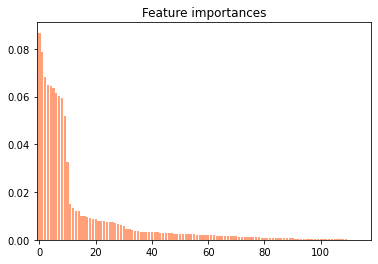

In [193]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
# plt.xticks(range(X_train.shape[1]), train_df.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [194]:
for i in train_df.columns[indices]: # the importance of columns from most important to least important
    print(i)

Score_Source_2
Score_Source_3
Age_Days
ID_Days
ID
Loan_Annuity
Credit_Amount
Phone_Change
Employed_Days
Client_Income
Credit_Bureau
Client_City_Rating
Active_Loan
Bike_Owned
House_Own
Car_Owned
Workphone_Working
Secondary Education
Homephone_Tag
Yes Match Tag
Business Entity Type 2 Organization
Post Grad Education
IT Occupation
Retired Income
RL Contract Type
Security Ministries Organization
Medicine Occupation
Default
Waiters/barmen Occupation
Realty agents Occupation
Mobile Organization
XNA Gender
Core Occupation
Cooking Occupation
Business Entity Type 1 Organization
Home Housing Type
Cleaning Organization
Low-skill Laborers Occupation
Commercial Income
Emergency Organization
Trade: type 6 Organization
Secretaries Occupation
Maternity leave Income
Cleaning Occupation
Legal Services Organization
Office Housing Type
Transport: type 3 Organization
Bank Organization
Other Housing Type
Unemployed Income
HR Occupation
Junior secondary Education
Male Gender
Insurance Organization
Shared Hou

In [195]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9264351111757012
[[31591     2]
 [ 2529   283]]


In [196]:
hgb = HistGradientBoostingClassifier(loss='binary_crossentropy', max_iter=1000)
hgb.fit(X_train, y_train)
predictions = hgb.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9180061037639878
[[31565    28]
 [ 2793    19]]


In [197]:
X = train_df[['Score_Source_2',
'Score_Source_3',
'Age_Days',
'ID_Days',
'Loan_Annuity',
'ID',
'Credit_Amount',
'Phone_Change',
'Employed_Days',
'Client_Income',
'Credit_Bureau',
'Client_City_Rating',
'Active_Loan',
'Bike_Owned',
'House_Own',
'Car_Owned']]
y = train_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [198]:
xgb2 = XGBClassifier(objective="binary:logistic", random_state=101)
xgb2.fit(X_train, y_train)
predictions = xgb2.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9180351693067869
[[31512    81]
 [ 2739    73]]


In [199]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9235866879813981
[[31581    12]
 [ 2617   195]]


In [200]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9261153902049121
[[31587     6]
 [ 2536   276]]


In [201]:
hgb = HistGradientBoostingClassifier(loss='binary_crossentropy', max_iter=1000)
hgb.fit(X_train, y_train)
predictions = hgb.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.9181223659351838
[[31577    16]
 [ 2801    11]]


In [202]:
X = train_df.drop('Default', axis=1) # splitting the data into training and testing dataset
y = train_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [203]:
ann = Sequential()

ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(16, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(8, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam')

In [204]:
ann.fit(x=X_train.values, 
          y=y_train.values, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test.values, y_test.values) 
          )

Epoch 1/25
314/314 [==============================] - 3s 4ms/step - loss: 0.6332 - val_loss: 0.5786
Epoch 2/25
314/314 [==============================] - 1s 4ms/step - loss: 0.5337 - val_loss: 0.4940
Epoch 3/25
314/314 [==============================] - 1s 4ms/step - loss: 0.4607 - val_loss: 0.4322
Epoch 4/25
314/314 [==============================] - 1s 4ms/step - loss: 0.4076 - val_loss: 0.3876
Epoch 5/25
314/314 [==============================] - 1s 4ms/step - loss: 0.3693 - val_loss: 0.3555
Epoch 6/25
314/314 [==============================] - 1s 4ms/step - loss: 0.3417 - val_loss: 0.3325
Epoch 7/25
314/314 [==============================] - 1s 4ms/step - loss: 0.3220 - val_loss: 0.3162
Epoch 8/25
314/314 [==============================] - 1s 4ms/step - loss: 0.3080 - val_loss: 0.3047
Epoch 9/25
314/314 [==============================] - 1s 4ms/step - loss: 0.2983 - val_loss: 0.2968
Epoch 10/25
314/314 [==============================] - 1s 4ms/step - loss: 0.2915 - val_loss: 0.2914

In [205]:
predictions = (ann.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,predictions)

1076/1076 [==============================] - 1s 990us/step


0.9182676936491789

In [206]:
confusion_matrix(y_test,predictions)

array([[31593,     0],
       [ 2812,     0]], dtype=int64)

We can see that the above models are not able to predict 1's due to less number of training data for Defaulted entries.
So we try to reduce the number of 0's in the training dataset.

In [207]:
train_df[train_df['Default'] == 1]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Age_Days,Employed_Days,...,Trade: type 4 Organization,Trade: type 5 Organization,Trade: type 6 Organization,Trade: type 7 Organization,Transport: type 1 Organization,Transport: type 2 Organization,Transport: type 3 Organization,Transport: type 4 Organization,University Organization,XNA Organization
31,12199634,11250.0,0.0,0.0,1.0,1.0,18000.0,900.00000,16900.0,2283.0,...,0,0,0,0,0,0,0,0,0,0
72,12119933,22500.0,0.0,0.0,1.0,0.0,14391.0,2720.73567,17266.0,796.0,...,0,0,0,0,0,0,0,0,0,0
74,12205360,15750.0,0.0,0.0,0.0,0.0,15750.0,1158.75000,14888.0,1286.0,...,0,0,0,0,0,0,0,0,0,0
92,12192978,13500.0,1.0,0.0,1.0,1.0,22500.0,2362.50000,11724.0,2279.0,...,0,0,0,0,0,0,0,0,0,0
115,12103508,12600.0,0.0,0.0,0.0,0.0,29628.0,1906.20000,12072.0,1422.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114606,12164880,13500.0,1.0,0.0,1.0,0.0,130500.0,3815.55000,16121.0,398.0,...,0,0,0,0,0,0,1,0,0,0
114617,12207679,24750.0,0.0,1.0,1.0,0.0,88885.8,8894.25000,11481.0,196.0,...,0,0,0,0,0,0,0,0,0,0
114654,12154927,15750.0,0.0,0.0,1.0,0.0,44776.8,3550.50000,8991.0,390.0,...,0,0,0,0,0,0,0,0,0,0
114655,12113877,9000.0,0.0,0.0,1.0,1.0,13500.0,675.00000,12661.0,370.0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
train_df[train_df['Default'] == 0]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Age_Days,Employed_Days,...,Trade: type 4 Organization,Trade: type 5 Organization,Trade: type 6 Organization,Trade: type 7 Organization,Transport: type 1 Organization,Transport: type 2 Organization,Transport: type 3 Organization,Transport: type 4 Organization,University Organization,XNA Organization
0,12142509,6750.0,0.0,0.0,1.0,0.0,61190.55,3416.85,13957.0,1062.0,...,0,0,0,0,0,0,0,0,0,0
1,12138936,20250.0,1.0,0.0,1.0,0.0,15282.00,1826.55,14162.0,4129.0,...,0,0,0,0,0,0,0,0,0,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,59527.35,2788.20,16790.0,5102.0,...,0,0,0,0,0,0,0,0,0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,53870.40,2295.45,23195.0,365243.0,...,0,0,0,0,0,0,0,0,0,1
4,12133385,33750.0,1.0,0.0,1.0,0.0,133988.40,3547.35,11366.0,2977.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114675,12136406,12150.0,0.0,0.0,1.0,0.0,78192.00,2383.65,23943.0,365243.0,...,0,0,0,0,0,0,0,0,0,1
114677,12173765,15750.0,0.0,1.0,1.0,0.0,104256.00,3388.05,8648.0,636.0,...,0,0,0,0,0,0,0,0,0,0
114678,12103937,8100.0,0.0,1.0,0.0,1.0,55107.90,2989.35,9152.0,1623.0,...,0,0,1,0,0,0,0,0,0,0
114679,12170623,38250.0,1.0,1.0,0.0,1.0,45000.00,2719.35,10290.0,847.0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
105409/(9272 + 105409)

0.9191496411785736

In [210]:
training_df = train_df[train_df['Default'] == 0].sample(30000)
training_df = pd.concat([training_df,train_df[train_df['Default'] == 1]],axis=0,ignore_index=True).sample(frac=1)

In [211]:
X = training_df.drop('Default', axis=1) # splitting the data into training and testing dataset
y = training_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [212]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.7962994398234595
[[8831  151]
 [2249  551]]


In [213]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [214]:
ann = Sequential()

ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(8, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam')

fit = ann.fit(x=X_train.values, 
          y=y_train.values, 
          epochs=20,
          validation_data=(X_test.values, y_test.values),
          callbacks=[early_stopping]
          )

Epoch 1/20
860/860 [==============================] - 3s 2ms/step - loss: 7250.7373 - val_loss: 0.5791
Epoch 2/20
860/860 [==============================] - 2s 2ms/step - loss: 94.7901 - val_loss: 0.5518
Epoch 3/20
860/860 [==============================] - 2s 2ms/step - loss: 71.9738 - val_loss: 0.5486
Epoch 4/20
860/860 [==============================] - 2s 2ms/step - loss: 66.9771 - val_loss: 0.5484
Epoch 5/20
860/860 [==============================] - 2s 2ms/step - loss: 51.3944 - val_loss: 0.5484
Epoch 6/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5456 - val_loss: 0.5484
Epoch 7/20
860/860 [==============================] - 2s 2ms/step - loss: 8.2305 - val_loss: 0.5484
Epoch 8/20
860/860 [==============================] - 2s 2ms/step - loss: 28.4037 - val_loss: 0.5484
Epoch 8: early stopping


In [215]:
predictions = (ann.predict(X_test) > 0.45).astype("int32")
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

369/369 [==============================] - 1s 946us/step
0.7623493464607027
[[8982    0]
 [2800    0]]


In [216]:
scaler = MinMaxScaler()
training_df = pd.DataFrame(scaler.fit_transform(training_df), columns=training_df.columns)

In [217]:
X = training_df.drop('Default', axis=1) # splitting the data into training and testing dataset
y = training_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [218]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.7939229332880665
[[8831  151]
 [2277  523]]


In [219]:
ann = Sequential()

ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(8, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam')

fit = ann.fit(x=X_train.values, 
          y=y_train.values, 
          epochs=20,
          validation_data=(X_test.values, y_test.values),
          callbacks=[early_stopping]
          )

Epoch 1/20
860/860 [==============================] - 3s 2ms/step - loss: 0.5538 - val_loss: 0.5234
Epoch 2/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5259 - val_loss: 0.5112
Epoch 3/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5153 - val_loss: 0.5121
Epoch 4/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5094 - val_loss: 0.5065
Epoch 5/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5086 - val_loss: 0.5062
Epoch 6/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5054 - val_loss: 0.5046
Epoch 7/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5047 - val_loss: 0.5023
Epoch 8/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5033 - val_loss: 0.5032
Epoch 9/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5004 - val_loss: 0.5037
Epoch 9: early stopping


<AxesSubplot:>

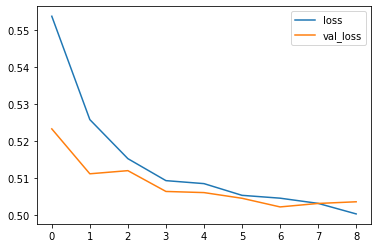

In [220]:
pd.DataFrame(fit.history).plot()

In [221]:
predictions = (ann.predict(X_test) > 0.45).astype("int32")
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

369/369 [==============================] - 0s 1ms/step
0.7585299609573927
[[8187  795]
 [2050  750]]


In [222]:
X = training_df[['Score_Source_2',
'Score_Source_3',
'Age_Days',
'ID_Days',
'Loan_Annuity',
'ID',
'Credit_Amount',
'Phone_Change',
'Employed_Days',
'Client_Income',
'Credit_Bureau',
'Client_City_Rating',
'Active_Loan',
'Bike_Owned',
'House_Own',
'Car_Owned']]
y = training_df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [223]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

0.7949414360889493
[[8765  251]
 [2165  601]]


In [224]:
ann = Sequential()

ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(8, activation='relu'))
ann.add(Dropout(0.4))

ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='adam')

fit = ann.fit(x=X_train.values, 
          y=y_train.values, 
          epochs=20,
          validation_data=(X_test.values, y_test.values),
          callbacks=[early_stopping]
          )

Epoch 1/20
860/860 [==============================] - 3s 2ms/step - loss: 0.6213 - val_loss: 0.5724
Epoch 2/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5583 - val_loss: 0.5481
Epoch 3/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5482 - val_loss: 0.5452
Epoch 4/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5473 - val_loss: 0.5450
Epoch 5/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5472 - val_loss: 0.5450
Epoch 6/20
860/860 [==============================] - 2s 2ms/step - loss: 0.5473 - val_loss: 0.5450
Epoch 6: early stopping


In [225]:
predictions = (ann.predict(X_test) > 0.5).astype("int32")
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

369/369 [==============================] - 0s 957us/step
0.7652351043965371
[[9016    0]
 [2766    0]]


We see that ExtraTreesClassifier give the best accuracy score. Therefore we use this model to predict the testing dataset values

In [226]:
X_train = train_df.drop('Default', axis=1) # splitting the data into training and testing dataset
y_train = train_df['Default']

X_test = test_df.loc[:,X_train.columns]

In [227]:
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)
predictions_1 = etc.predict(X_test)

In [228]:
for i in predictions_1:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
